ああああ

In [1]:
# セル 1: 必要なライブラリをインポートしてデータを取得
import pandas as pd
import io

# USGS CSV (過去30日)
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"

# pandasで直接読み込む（requests不要）
data = pd.read_csv(url)

# 簡単な確認
print(f"データ件数: {len(data)}")
data.head()


データ件数: 7640


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-05T11:54:28.830Z,35.605667,-117.48967,6.7400,1.044691,ml,9.0,113.0,0.08003,0.15,...,2025-11-05T11:56:30.842Z,"17 km E of Ridgecrest, CA",earthquake,0.7,1.720000,0.226373,7.0,automatic,ci,ci
1,2025-11-05T11:54:28.830Z,35.605667,-117.48967,6.7400,1.160000,ml,9.0,113.0,0.08003,0.15,...,2025-11-05T11:56:31.112Z,"17 km E of Ridgecrest, CA",earthquake,0.7,1.720000,0.168000,3.0,automatic,ci,ci
2,2025-11-05T11:18:17.587Z,64.157900,-147.93130,11.2000,1.100000,ml,NaN,NaN,NaN,0.27,...,2025-11-05T11:20:25.985Z,"59 km ENE of Ferry, Alaska",earthquake,NaN,0.600000,NaN,NaN,automatic,ak,ak
3,2025-11-05T11:13:27.366Z,65.091400,-141.32550,16.7000,2.100000,ml,NaN,NaN,NaN,0.91,...,2025-11-05T11:16:14.123Z,"34 km N of Eagle, Alaska",earthquake,NaN,0.800000,NaN,NaN,automatic,ak,ak
4,2025-11-05T11:09:14.712Z,30.743000,-103.66500,6.9074,1.600000,ml,6.0,212.0,0.30000,1.00,...,2025-11-05T11:14:38.852Z,"27 km SSE of Balmorhea, Texas",earthquake,0.0,14.588511,0.800000,4.0,automatic,tx,tx


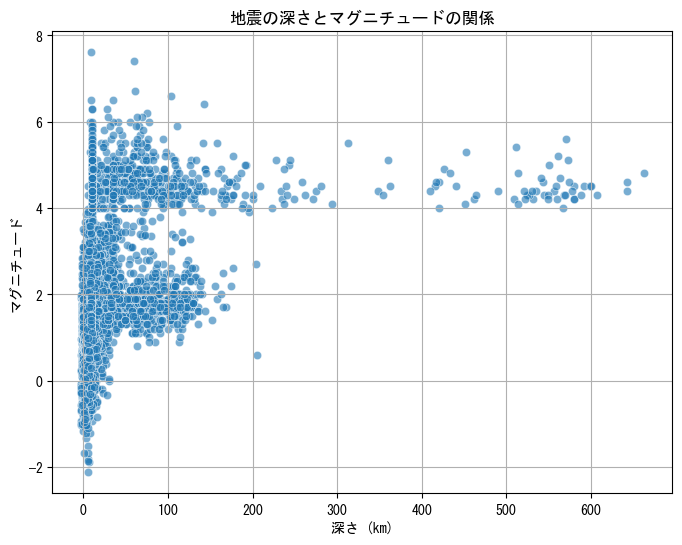

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 日本語フォント（Windows）
matplotlib.rcParams['font.family'] = 'MS Gothic'

# データ取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# 散布図（深さ vs マグニチュード）
plt.figure(figsize=(8,6))
sns.scatterplot(x="depth", y="mag", data=data, alpha=0.6)

plt.title("地震の深さとマグニチュードの関係")
plt.xlabel("深さ (km)")
plt.ylabel("マグニチュード")
plt.grid(True)
plt.show()


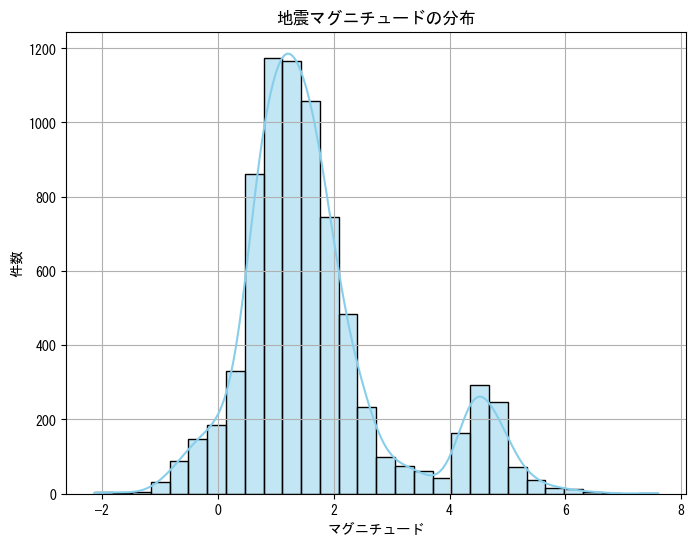

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# 日本語フォント設定
matplotlib.rcParams['font.family'] = 'MS Gothic'

# データ取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
data = pd.read_csv(url)

# マグニチュードのヒストグラム
plt.figure(figsize=(8,6))
sns.histplot(data["mag"].dropna(), bins=30, kde=True, color="skyblue")

plt.title("地震マグニチュードの分布")
plt.xlabel("マグニチュード")
plt.ylabel("件数")
plt.grid(True)
plt.show()


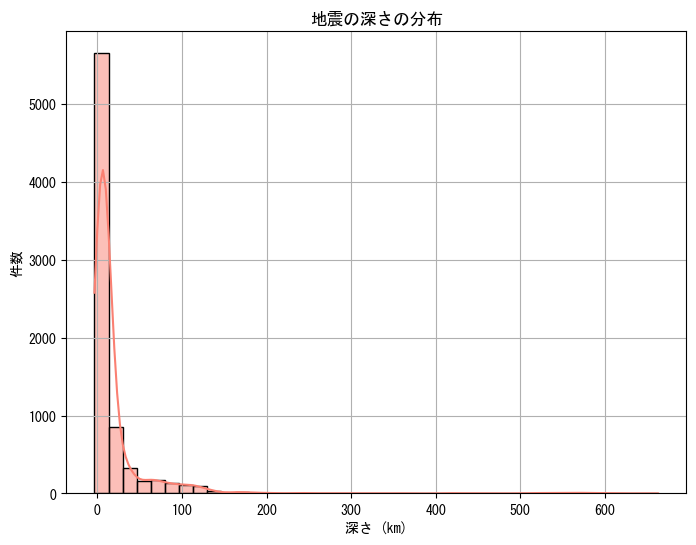

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(data["depth"].dropna(), bins=40, kde=True, color="salmon")

plt.title("地震の深さの分布")
plt.xlabel("深さ (km)")
plt.ylabel("件数")
plt.grid(True)
plt.show()


In [13]:
# セル 2: マグニチュードと深さの相関係数を計算
# 'mag' がマグニチュード, 'depth' が深さ（km）
corr = data['mag'].corr(data['depth'])
print(f"マグニチュードと深さの相関係数: {corr:.3f}")


マグニチュードと深さの相関係数: 0.384
